In [146]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import librosa

In [147]:
from src import preprocess

## Load the pickle dataset as a Pandas dataframe

In [158]:
df = pd.read_pickle("../data/dataset.pkl")

In [159]:
df.head()

,audio_path,file_stem,class,start_time,end_time,orig_duration,new_duration
0,/Users/rayandaod/Documents/Prod/My_samples/AP1...,ap11 transi 3,None,0.022653,0.127415,6.294422,0.104762
1,/Users/rayandaod/Documents/Prod/My_samples/AP1...,ap11 transi 2,None,0.002698,NaN,7.619048,7.619048
2,/Users/rayandaod/Documents/Prod/My_samples/AP1...,ap11 transi 1,None,0.002698,NaN,7.619048,7.619048
3,/Users/rayandaod/Documents/Prod/My_samples/AP1...,ap11 transi 9 rendered (73a5b73699725e6b),None,0.000000,NaN,2.300726,2.300726
4,/Users/rayandaod/Documents/Prod/My_samples/AP1...,ap11 transi 5,None,0.002698,0.247143,3.428571,0.244444


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50015 entries, 0 to 50014
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   audio_path     50015 non-null  object 
 1   file_stem      50015 non-null  object 
 2   class          15533 non-null  object 
 3   start_time     50015 non-null  float64
 4   end_time       23916 non-null  float64
 5   orig_duration  50015 non-null  float64
 6   new_duration   50015 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.7+ MB


## Plot duration histograms for each class

In [102]:
dataframes = []
for drum_type in preprocess.DRUM_TYPES:
    new_df = df[df["class"] == drum_type]
    new_df.name = "{drum_type}s"
    dataframes.append(new_df)

In [103]:
dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3632 entries, 222 to 49896
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   audio_path     3632 non-null   object 
 1   file_stem      3632 non-null   object 
 2   class          3632 non-null   object 
 3   start_time     3632 non-null   float64
 4   end_time       235 non-null    float64
 5   orig_duration  3632 non-null   float64
 6   new_duration   3632 non-null   float64
dtypes: float64(4), object(3)
memory usage: 227.0+ KB


In [104]:
def draw_hist(df, drum_type, column):
    ax_list = df.hist(column=column, bins=200, figsize=(15,5), legend=True)
    ax_list[0][0].set_xlim((0, 50))
    ax_list[0][0].set_yscale("log")
    plt.title("{}s".format(drum_type))
    plt.xlabel('Time in seconds')
    plt.ylabel('Number of samples')

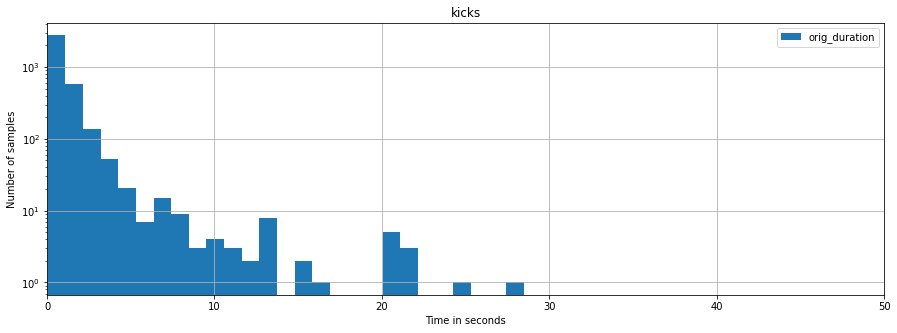

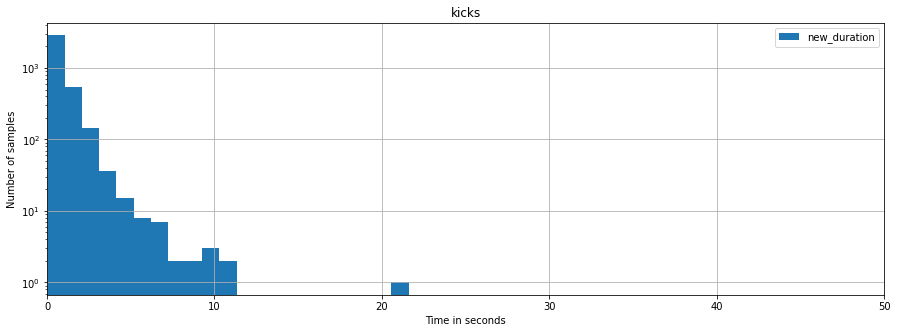

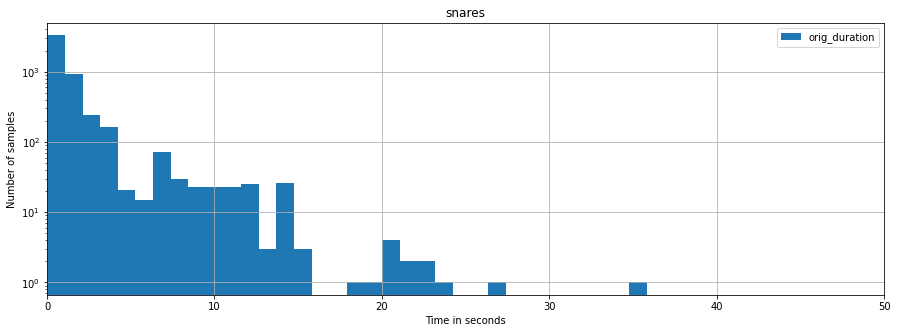

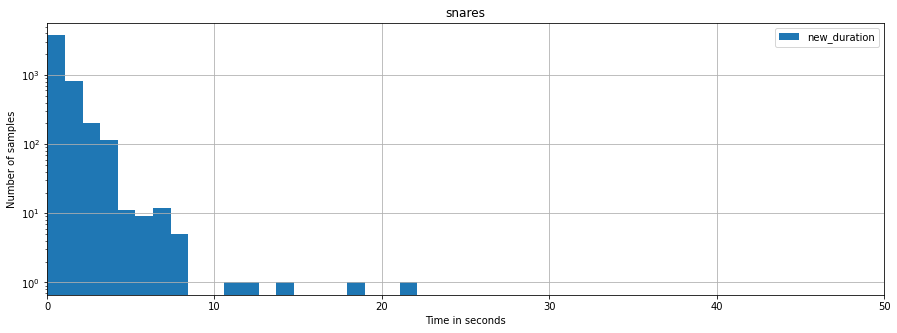

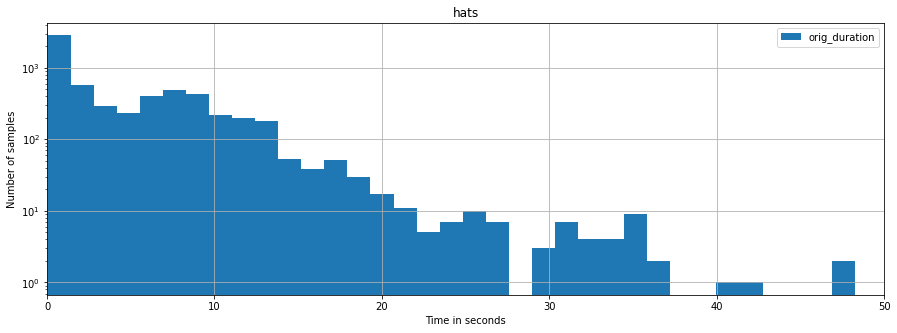

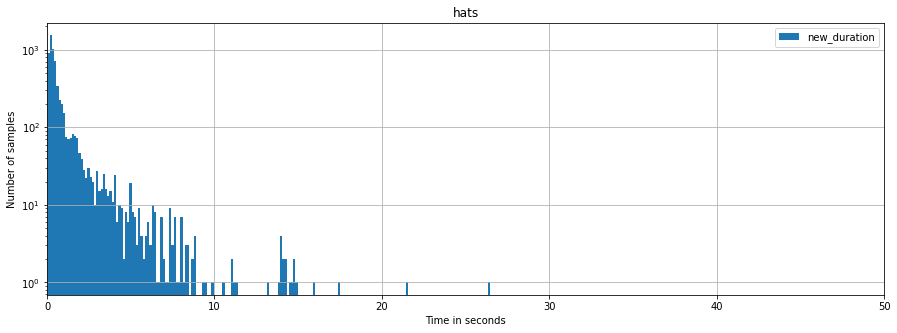

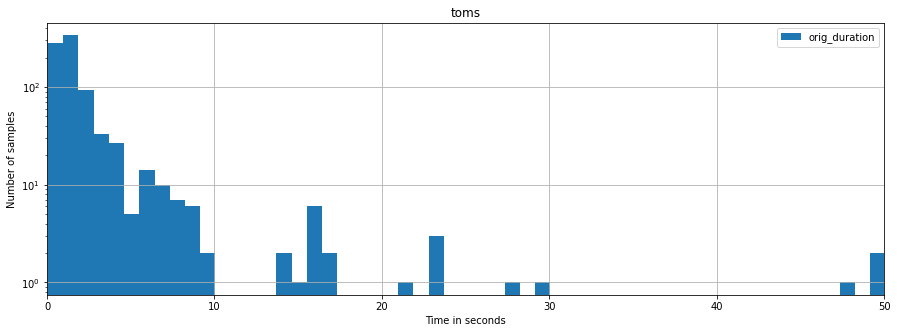

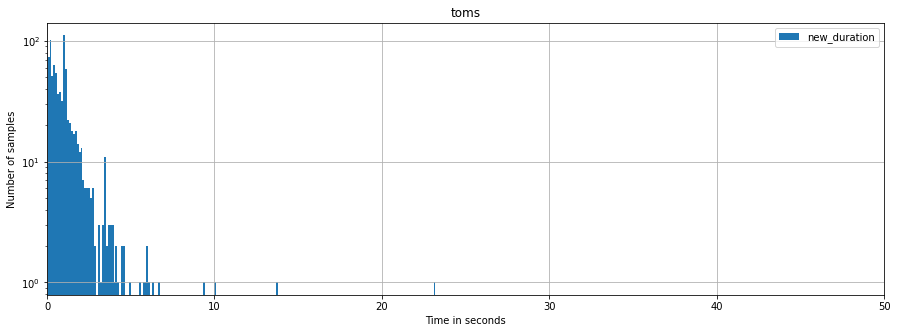

In [106]:
for i in range(len(dataframes)):
    draw_hist(dataframes[i], preprocess.DRUM_TYPES[i], column="orig_duration")
    draw_hist(dataframes[i], preprocess.DRUM_TYPES[i], column="new_duration")